In [1]:
%load_ext autoreload
%autoreload 2


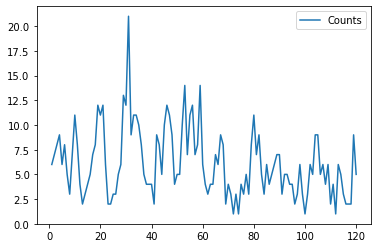

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import multinomial as multinom

df = pd.read_csv("trees.csv",index_col=[0])
df.plot()
plt.show()

In [92]:
n = len(df)

#Initialise order for INARMA(p,q)
q_init=2
p_init=2

#Initialise alpha_1,...,alpha_p,beta_1,...,beta_q,lambda
alpha=np.repeat(1/(p_init+1),p_init)
beta=np.repeat(1/(q_init+1),q_init)
lam=1

#Initalise augmented data
y=np.zeros([n,p_init])
v=np.zeros([n,q_init])
z= df.values
x_data=df.values
#Set maximum order
p_max=4
q_max=4

rmax=max(p_init,q_init)+2
init_augs=[y,v,z]
init_pars=[alpha,beta,lam]
init_order=[p_init,q_init]
order_max = [p_max, q_max]
N_reps = 5

In [93]:
from INARMA_RJMCMC import inarma_rjmcmc

from scipy.stats import binom

In [219]:
count, par_sample =inarma_rjmcmc(x_data,init_augs,init_pars,init_order,order_max,N_reps)

/home/flettj/INARMA_RJMCMC_py/INARMA_RJMCMC.py:104: RuntimeWarning: invalid value encountered in true_divide
  A=dist.pmf(zprop[t])/dist.pmf(z[t])


ValueError: could not broadcast input array from shape (120) into shape (120,1)

Help on built-in function array in module numpy:

array(...)
    array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0)
    
    Create an array.
    
    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an object whose
        __array__ method returns an array, or any (nested) sequence.
    dtype : data-type, optional
        The desired data-type for the array.  If not given, then the type will
        be determined as the minimum type required to hold the objects in the
        sequence.
    copy : bool, optional
        If true (default), then the object is copied.  Otherwise, a copy will
        only be made if __array__ returns a copy, if obj is a nested sequence,
        or if a copy is needed to satisfy any of the other requirements
        (`dtype`, `order`, etc.).
    order : {'K', 'A', 'C', 'F'}, optional
        Specify the memory layout of the array. If object is not an array, the
        newly c

In [209]:
    n=len(x)
    out=np.zeros([n,p+q+1])

    yprop=np.zeros([n,p])
    vprop=np.zeros([n,q])
    zprop = np.zeros([n,1])
    zprop[0:(rmax-1)] = x[0:(rmax-1)]

    for t in range(rmax-1,n):

        while True:

            for i in range(0,p):
                yprop[t,i] = binom(x[t-i],alphas[i]).rvs()
            for j in range(0,q):
                vprop[t,j] = binom(int(z[t-j]),betas[j]).rvs()
            zprop[t]=x[t]-sum(yprop[t,0:p-1])-sum(vprop[t,0:q-1])
            if zprop[t]>=0: 
                break

        uaug = np.random.rand()
        Q = np.min([q, n - t + 1])
        dist=poisson(lam)
        A=dist.pmf(zprop[t])/dist.pmf(z[t])
        if Q == 0:
            for i in range(0,Q):
                distprop=binom(zprop[t], betas[i])
                dist=binom(z[t], beta[i])
                np.seterr(invalid='ignore')

                A *= distprop.pmf(v[t+i,i])/dist.pmf(v[t+i,i])
            
        if uaug <= A :
            v[t,] = np.copy(vprop[t,])
            y[t,] = np.copy(yprop[t,])

            z[t,] = np.copy(zprop[t,])
            
    
    out[:,0:p] = np.copy(y)
    out[:,(p):(p+q)] = np.copy(v)
    out[:,(p+q):(p+q+1)] = np.copy(z)

In [210]:
out

array([[ 0.,  0.,  0.,  6.],
       [ 0.,  0.,  0.,  7.],
       [ 0.,  0.,  0.,  8.],
       [ 0.,  0.,  0.,  9.],
       [ 0.,  0.,  0.,  6.],
       [ 4.,  2.,  0.,  6.],
       [ 1.,  1.,  0.,  4.],
       [ 2.,  0.,  4.,  3.],
       [ 3.,  1.,  1.,  6.],
       [ 4.,  3.,  1.,  8.],
       [ 3.,  5.,  3.,  3.],
       [ 0.,  2.,  0.,  2.],
       [ 1.,  1.,  1.,  1.],
       [ 0.,  1.,  0.,  2.],
       [ 2.,  2.,  1.,  2.],
       [ 3.,  2.,  0.,  3.],
       [ 5.,  3.,  0.,  4.],
       [ 2.,  3.,  3.,  5.],
       [ 2.,  7.,  2.,  5.],
       [ 3.,  5.,  3.,  6.],
       [ 6.,  5.,  1.,  7.],
       [ 0.,  1.,  1.,  5.],
       [ 2.,  1.,  2.,  1.],
       [ 2.,  0.,  0.,  2.],
       [ 0.,  1.,  2.,  2.],
       [ 1.,  0.,  2.,  3.],
       [ 0.,  1.,  2.,  4.],
       [ 1.,  2.,  0.,  4.],
       [ 4.,  8.,  2.,  5.],
       [ 5.,  3.,  2.,  9.],
       [ 7., 11.,  3., 10.],
       [ 5.,  2.,  2.,  7.],
       [ 4.,  4.,  2.,  7.],
       [ 4.,  9.,  4.,  2.],
       [ 3.,  